In [1]:
# Imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from string import digits

In [2]:
# Data
raw_data = pd.read_csv('../data/gem2_combined.csv')
raw_data.head()
invert = pd.read_csv('../data/emaginv/base_inversion.csv')
#invert = pd.read_csv('../data/emaginv/test_4.csv')
invert.head()

,x,y,layer1,layer2,layer3,layer4,layer5,layer6,layer7,layer8,...,depth90,depth91,depth92,depth93,depth94,depth95,depth96,depth97,depth98,depth99
0,344123.35,4482801.47,83.016487,83.598705,84.396678,85.476895,86.752785,87.129457,85.921776,83.270681,...,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9
1,344123.35,4482801.48,88.112931,88.011176,87.729121,87.284826,86.760937,86.300130,85.515213,83.900637,...,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9
2,344123.35,4482801.48,83.137556,83.859829,84.916257,86.274858,87.778212,88.144820,86.795757,83.977489,...,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9
3,344123.35,4482801.48,86.912086,86.829702,86.633542,86.204093,85.741196,85.320021,84.502752,82.886299,...,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9
4,344123.34,4482801.48,84.865220,84.695151,84.432088,83.946566,83.383768,82.937892,82.163890,80.637338,...,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9


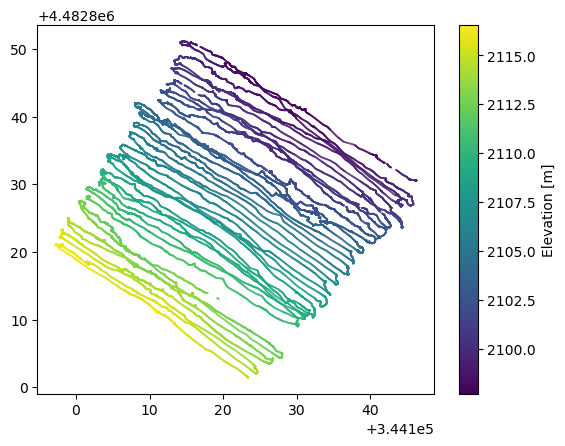

In [3]:
# Elevation plot
cbar = plt.scatter(raw_data['Easting [m]'], raw_data['Northing [m]'], c = raw_data['GPSalt'], s = 0.1)
plt.colorbar(label = 'Elevation [m]')

In [42]:
# Depth slices
for i in invert.columns[[2,6,11,16,21, 100]]:
    layer = i[-3:]
    layer = ''.join(c for c in layer if c in digits)
    plt.figure()
    plt.tricontourf(invert['x'], invert['y'], invert[f'layer{layer}'], levels = np.arange(-6.25, 165.25, 1.25), cmap = 'viridis_r')
    plt.colorbar(label = 'Conductivity [mS/m]')
    plt.xlabel('Easting [m]')
    plt.ylabel('Northing [m]')
    depth = invert[f'depth{layer}'][0]
    plt.title(f'Inversion Slice at {depth} m Deep')
    plt.annotate('Uphill', (invert['x'][0] - 20, invert['y'][0] + 43))
    plt.arrow(invert['x'][0] - 17.5, invert['y'][0] + 42, -5, -10, head_width = 1)

SyntaxError: expected ':' (3582189982.py, line 2)

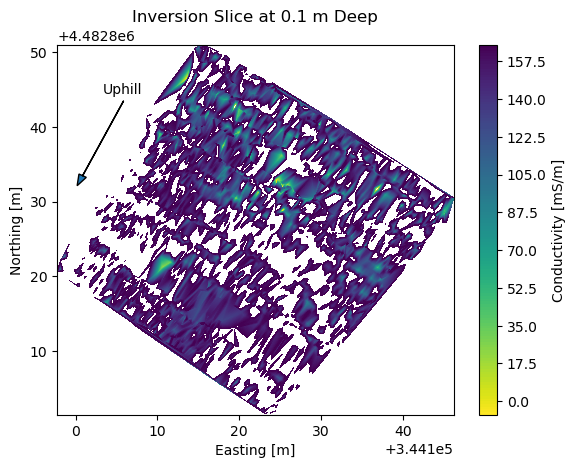

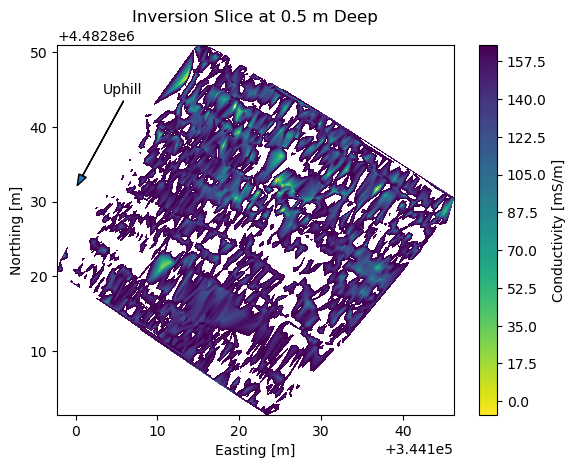

In [44]:
# Bad inversion, uses 450 Hz
bad_invert = pd.read_csv('../data/emaginv/test_4.csv')
for i in bad_invert.columns[[2,6]]: #,11,16,21, 100]]:
    layer = i[-3:]
    layer = ''.join(c for c in layer if c in digits)
    plt.figure()
    plt.tricontourf(bad_invert['x'], bad_invert['y'], bad_invert[f'layer{layer}'], levels = np.arange(-6.25, 165.25, 1.25), cmap = 'viridis_r')
    plt.colorbar(label = 'Conductivity [mS/m]')
    plt.xlabel('Easting [m]')
    plt.ylabel('Northing [m]')
    depth = invert[f'depth{layer}'][0]
    plt.title(f'Inversion Slice at {depth} m Deep')
    plt.annotate('Uphill', (bad_invert['x'][0] - 20, bad_invert['y'][0] + 43))
    plt.arrow(bad_invert['x'][0] - 17.5, bad_invert['y'][0] + 42, -5, -10, head_width = 1)